In [1]:
def Himmelblau_func(xk):
    x, y = xk
    return (x**2 + y-11)**2+(x+y**2-7)**2

In [2]:
import numpy as np

def gradient_func(xk):
    x, y = xk
    return np.array([4*x*(x**2+y-11) + 2*(x+y**2-7), 2*(x**2+y-11) + 4*y*(x+y**2-7)])

In [3]:
def delta_H(H, s, y):
    r = 1/( np.transpose(y)*s)
    return (1 - s * r * np.transpose(y)) * H * (1 - r * y * np.transpose(s)) + r * s * np.transpose(s)

In [4]:

x0 = [1, 1]
Hk = [1, 1]
xk = x0
k = 0
diff = 1

while k < 100 and abs(diff) > 1e-5 :
    sk =  -np.transpose(Hk) * gradient_func(xk)
    yk = gradient_func(xk + sk) - gradient_func(xk)
    
    xk = xk + sk

    Hk = delta_H(Hk, sk, yk)
    
    diff = np.sum(gradient_func(xk)**2)

    print('iteration: '+ str(k) +', X'+str(xk)+' | '+ str(Himmelblau_func(xk))+' | '+ str(gradient_func(xk))+'|   error :'+ str(diff))
    k = k + 1
    

iteration: 0, X[47 39] | 7440890 | [423678 247990]|   error :483919208
iteration: 1, X[1.00499382 1.00582192] | 105.54879218031576 | [-46.08278001 -38.017695  ]|   error :3568.967746481078
iteration: 2, X[1.00999608 1.01164566] | 105.09661481499508 | [-46.16479272 -38.03418878]|   error :3577.7876026901304
iteration: 3, X[ -1.80576582 -12.41774047] | 21545.8669428518 | [  436.38395282 -7262.19919567]|   error :52929968.11189374
iteration: 4, X[0.7406159  1.08234945] | 113.66752347524414 | [-37.93153982 -40.76583663]|   error :3100.655149358353
iteration: 5, X[0.53697891 1.15855904] | 117.48382055903087 | [-30.76076549 -42.8370098 ]|   error :2781.234102319814
iteration: 6, X[-0.33657106 -0.41764468] | 179.08496548437648 | [  0.89460006 -10.64380379]|   error :114.09086844408115
iteration: 7, X[-0.311884   -0.93877337] | 181.57363268918357 | [1.91152277 0.46445769]|   error :3.8696402583612026
iteration: 8, X[-0.35828859 -0.91698398] | 181.44828313845161 | [3.86004442 0.32828528]|   err

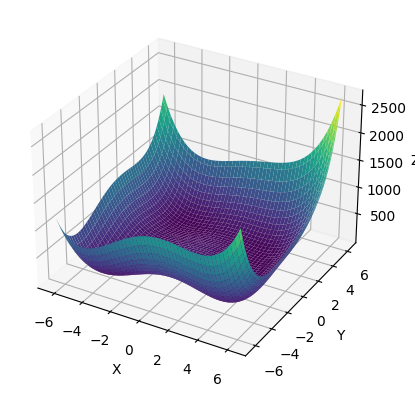

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time

x = np.linspace(-2*np.pi, 2*np.pi,100)
y = np.linspace(-2*np.pi, 2*np.pi,100)

X, Y = np.meshgrid(x,y)
Z = Himmelblau_func(np.array([X,Y]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z,cmap ='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(xk[0],xk[1],Himmelblau_func(xk))